Based on this dataset, which includes features related to cars such as transmission type, engine size, fuel type, powertrain, and CO2 emissions, you could define a clustering problem to group similar cars together based on their characteristics. Here's how you could frame the problem:

## Problem Definition:

Cluster cars based on their attributes to identify groups of vehicles with similar characteristics.

## Objective:
The objective is to segment the cars into distinct groups or clusters, where each cluster represents a set of cars with similar features. This segmentation can help in various ways:

Market Segmentation: Understand different market segments based on car attributes, allowing for targeted marketing strategies.

Product Planning: Identify patterns in car attributes to inform product planning and development decisions.

Customer Insights: Gain insights into customer preferences by analyzing the characteristics of cars they prefer.

Environmental Impact Analysis: Analyze the distribution of CO2 emissions across different car types and identify trends or areas for improvement.

## Features:

Transmission: Type of transmission (e.g., manual, automatic).
Engine Size (cm3): The size of the car's engine in cubic centimeters.
Fuel Type: Type of fuel used by the car (e.g., petrol, electricity).
Powertrain: The type of powertrain (e.g., internal combustion engine, hybrid).
CO2 Emission: The amount of CO2 emissions produced by the car.

## Proposed Solution:

Use k-means clustering to group cars into clusters based on their attributes. This will enable the identification of distinct groups of cars with similar characteristics. The number of clusters (k) needs to be determined based on the characteristics of the dataset and the desired level of granularity in segmentation.

Validation and Interpretation:
After clustering, evaluate the results using metrics like silhouette score, within-cluster sum of squares (WCSS), or visual inspection of clusters. Interpret the clusters to understand the characteristics of each group and assess whether the segmentation aligns with domain knowledge or business goals.

Potential Insights:

Identification of car segments based on attributes such as engine size, transmission type, and fuel type.
Understanding the relationship between CO2 emissions and other car features.
Insights into market trends, customer preferences, and environmental impact based on car segmentation.

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")


# Load the dataset
df = pd.read_csv(r'C:\Users\USER\Desktop\ALL MY TASKS\TSI DATA SCIENCE\Datasets\Excel workbooks\emmission.csv')

df.head(10)

,car_id,transmission,engine_size_cubic_cm,fuel_type,powertrain,carbon_four_oxide_emmission,engine_size_cubic_cm_bins
0,269,Manual,999,Petrol,Internal Combustion Engine (ICE),155,0
1,270,Manual,999,Petrol,Internal Combustion Engine (ICE),166,0
2,279,Manual,999,Petrol,Internal Combustion Engine (ICE),147,0
3,280,Manual,999,Petrol,Internal Combustion Engine (ICE),160,0
4,283,Manual,999,Petrol,Internal Combustion Engine (ICE),147,0
5,284,Manual,999,Petrol,Internal Combustion Engine (ICE),160,0
6,287,Manual,999,Petrol,Internal Combustion Engine (ICE),147,0
7,291,Manual,999,Petrol,Internal Combustion Engine (ICE),147,0
8,292,Manual,999,Petrol,Internal Combustion Engine (ICE),160,0
9,479,Manual,999,Petrol,Internal Combustion Engine (ICE),120,0


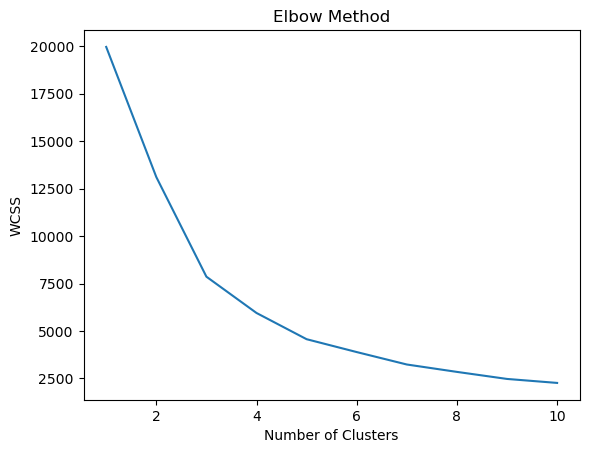

In [8]:


# Handle missing values if present
df.dropna(inplace=True)

# Encode categorical variables using label encoding
label_encoder = LabelEncoder()
df['Transmission'] = label_encoder.fit_transform(df['transmission'])
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
df['powertrain'] = label_encoder.fit_transform(df['powertrain'])

# Step 2: Feature Selection
features = df[['engine_size_cubic_cm', 'carbon_four_oxide_emmission']]

# Step 3: Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Finding Optimal Number of Clusters -- hyperparameter tuning
wcss = [] #wcss stands for within clusters sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



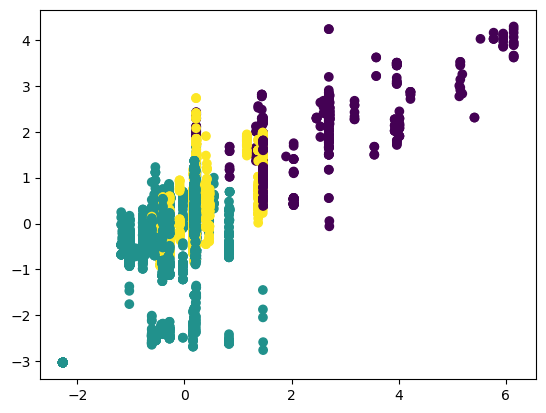

In [11]:
plt.scatter(scaled_features[:,0],scaled_features[:,1], c=kmeans.labels_, cmap='viridis')
plt.show()

The average silhouette_score is : 0.5172715315592658


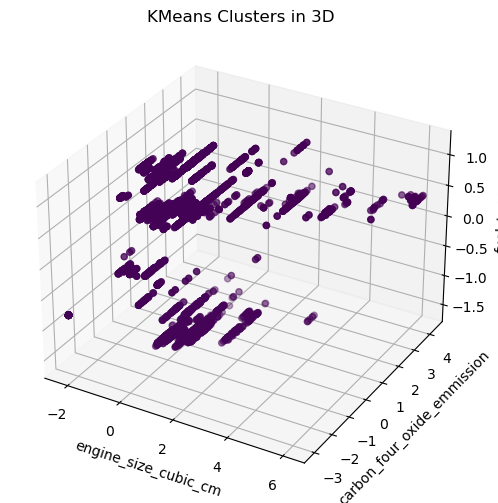

In [10]:
# Step 5: K-means Clustering
# Choose the optimal number of clusters based on the elbow method or silhouette analysis
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(scaled_features)

# Step 6: Evaluation and Interpretation
# Evaluate the clustering results
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)

# Visualize the clusters
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Use your KMeans fitted labels for coloring
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

# Extract data for each feature dimension
feature1 = scaled_features[:, 0]
feature2 = scaled_features[:, 1]
feature3 = scaled_features[:, 2]

# Assign colors based on cluster labels
colors = plt.cm.viridis(kmeans.labels_)

# Create the 3D scatter plot
ax.scatter(feature1, feature2, feature3, c=colors)

# Set labels and title
ax.set_xlabel('engine_size_cubic_cm')
ax.set_ylabel('carbon_four_oxide_emmission')
ax.set_zlabel('fuel_type')
ax.set_title('KMeans Clusters in 3D')

plt.show()

In [ ]:
df.head(10)

In [ ]:
df1 = pd.read_csv(r'C:\Users\USER\Desktop\ALL MY TASKS\TSI DATA SCIENCE\Datasets\Excel workbooks\co2_emmision_by_vehicle.csv')

In [ ]:
df1.head(10)

In [ ]:
df1['Transmission'].unique()

In [ ]:
df1['transmission'] = df['Transmission'].map({'Manual':0,'Automatic':1})

In [ ]:
df1.head()

In [ ]:
shop_list = []
shop_list.append("Meat")
shop_list

In [ ]:
# Assuming you have performed clustering and stored the cluster labels in a column named 'Cluster'
# Add the cluster labels to DataFrame df
df['Cluster'] = kmeans.labels_

clustered_cars = df.groupby('Cluster')['car_id'].apply(list)

# Print the car IDs in each cluster
for cluster, car_ids in clustered_cars.items():
    print(f'Cluster {cluster}: {car_ids}')
